# Learner Playground

Notebook created with the intent of offering a handy environment to test out learners and simulations.

#### Import statements
Used to import local functions/modules or external libraries inside the notebook.

In [1]:
from ola2022_project.environment.environment import example_environment, Feature, Step, UserClassParameters
from ola2022_project.simulation.simulation import simulation 
from ola2022_project.learners import AlphalessLearner
from ola2022_project.algorithms.context_splitting import Context, tree_generation
from ola2022_project.simulation.dataset_simulation import DatasetSimParameters

import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Additional import statements

#### Plotting functions
Functions used to plot data onto a graph for an immediate visualization and analysis.

In [3]:
# Helper function that computes the means for n slices of a given dimension for an array
def mean_slices(array, dim, n):
    ret = []
    for i in range(n):
        ret.append(np.mean(array[i * dim : dim * (i + 1)]))
    return ret

# Plot colors
colors = ['aqua', 'black', 'blue', 'blueviolet', 'burlywood', 'cadetblue', 'chocolate', 
          'coral', 'crimson', 'cyan', 'forestgreen', 'fuchsia', 'gold', 'green', 'hotpink', 
          'indigo', 'lime', 'magenta','navy', 'orange', 'purple', 'red', 'salmon', 
          'silver', 'teal', 'turquoise', 'violet']
n_colors = len(colors)

In [4]:
# Function used for quickly plotting multiple experiments onto a graph
def plot_experiments_days(n_days, rewards, days_step=1, show_mean=True, 
                          cumulate=False, show_markers=True, names=None):
    # Calculating and shaping data that is going to be shown on the graph
    days = np.arange(1, n_days + 1, days_step)
    n_exp = len(rewards)
    new_n_days = len(days)
    plot_rewards = np.array(list(map(lambda r: mean_slices(r, days_step, new_n_days), rewards)))
    if(cumulate):
        plot_rewards = np.array(list(map(lambda r: np.cumsum(r), plot_rewards)))
    # Graphical tuning
    marker = "." if show_markers else ""
    plot_colors = \
            random.sample(colors, n_exp) if n_exp <= n_colors else random.choice(colors, n_exp)
    plot_names = ["Experiment {n}" for i in range(len(plot_rewards))]
    if names and len(names) >= len(plot_rewards):
        plot_names = names
    # Creating a new figure and plotting the data onto it
    plt.figure()
    for i, reward in enumerate(plot_rewards):
        plt.plot(days, reward, label=plot_names[i].format(n=i+1), marker=marker, 
                 linestyle='-', color=plot_colors[i])
        if(show_mean):
            mean = [np.mean(plot_rewards[i])] * new_n_days
            plt.plot(days, mean, label="Mean of " + plot_names[i].format(n=i+1), 
                     linestyle='--', color=plot_colors[i])
    # Setting labels and showing the figure
    plt.xlabel("days")
    plt.ylabel("reward")
    plt.legend(loc = "best")
    plt.show()

In [5]:
# Additional plotting functions

#### Environment setup
Create the environment reference with customizable parameters.

In [6]:
# Random Number Generator used as a source of randomness by the environment and the simulation
rng = np.random.default_rng()

# Environment separated default parameters
env_classes_parameters = [
    [
        UserClassParameters(8, 0.06, 1, 160),
        UserClassParameters(10, 0.06, 1, 150),
        UserClassParameters(10, 0.07, 0.8, 160),
        UserClassParameters(8, 0.03, 0.4, 120),
        UserClassParameters(7, 0.06, 0.7, 150),
        UserClassParameters(14, 0.08, 0.1, 180),
    ],
    [
        UserClassParameters(25, 0.06, 1, 120),
        UserClassParameters(22, 0.03, 0.4, 100),
        UserClassParameters(20, 0.04, 0.5, 80),
        UserClassParameters(16, 0.05, 0.4, 150),
        UserClassParameters(24, 0.07, 0.3, 100),
        UserClassParameters(20, 0.03, 0.1, 110),
    ],
    [
        UserClassParameters(26, 0.03, 0.5, 120),
        UserClassParameters(33, 0.08, 0.5, 260),
        UserClassParameters(25, 0.07, 1.0, 280),
        UserClassParameters(30, 0.06, 0.6, 250),
        UserClassParameters(31, 0.03, 0.2, 290),
        UserClassParameters(36, 0.07, 0.3, 260),
    ],
]

In [7]:
# Creating the environment
env = example_environment(
    total_budget=300,
    class_ratios=[0.3, 0.6, 0.1],
    product_prices=[3, 15, 8, 22, 1],
    classes_parameters=env_classes_parameters,
    competitor_budget=100,
    lam=0.5,
    max_items=3,
    graph_fully_connected=True,
    graph_zeros_probability=0.5,
    next_products=[(2, 3), (0, 2), (1, 4), (4, 1), (3, 0)],
)

In [8]:
# Additional environment tuning

#### Running the simulation
Execute the simulation and collect the results.

In [9]:
# Simulation separated default parameters
sim_n_days=10

In [10]:
# Running the simulation
simulation_rewards = simulation(
    rng,
    env,
    learner_factory=AlphalessLearner,
    n_customers_mean=100,
    n_customers_variance=10,
    n_experiment=1,
    n_days=sim_n_days,
    n_budget_steps=5,
    step=Step.ONE
)

experiment:   0%|          | 0/1 [00:00<?, ?it/s]

day:   0%|          | 0/10 [00:00<?, ?it/s]

/home/riga/.cache/pypoetry/virtualenvs/ola2022-project-pNjlraNx-py3.10/lib64/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/riga/.cache/pypoetry/virtualenvs/ola2022-project-pNjlraNx-py3.10/lib64/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/riga/.cache/pypoetry/virtualenvs/ola2022-project-pNjlraNx-py3.10/lib64/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the speci

In [11]:
# Additional execution code

#### Plotting the results
Once the simulation has been run, collect the results and display them nicely using plotting functions.

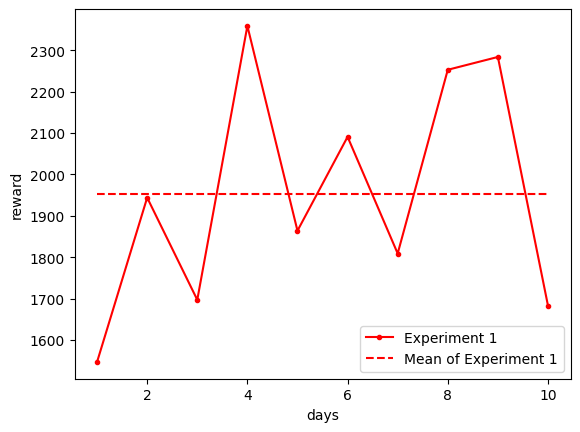

In [12]:
# Plotting the experiment
simulation_rewards, dataset = simulation_rewards
plot_experiments_days(sim_n_days, simulation_rewards, days_step=1, 
                      show_mean=True, cumulate=False, show_markers=True, 
                      names=["Experiment {n}"])

In [13]:
# %store -r
dataset

[[[Interaction(user_features=[Feature(name='feature_1', value=0), Feature(name='feature_2', value=1)], user_class=0, items_bought=array([0, 0, 3, 0, 0], dtype=int8), landed_on=2, edges=[(2, 1)]),
   Interaction(user_features=[Feature(name='feature_1', value=1), Feature(name='feature_2', value=0)], user_class=1, items_bought=array([0, 0, 0, 0, 0], dtype=int8), landed_on=3, edges=[]),
   Interaction(user_features=[Feature(name='feature_1', value=1), Feature(name='feature_2', value=0)], user_class=1, items_bought=array([3, 1, 3, 0, 0], dtype=int8), landed_on=1, edges=[(1, 0), (0, 2)]),
   Interaction(user_features=[Feature(name='feature_1', value=1), Feature(name='feature_2', value=0)], user_class=1, items_bought=array([0, 0, 0, 0, 0], dtype=int8), landed_on=3, edges=[]),
   Interaction(user_features=[Feature(name='feature_1', value=0), Feature(name='feature_2', value=1)], user_class=0, items_bought=array([0, 0, 0, 0, 0], dtype=int8), landed_on=3, edges=[]),
   Interaction(user_features=[

In [14]:
contexts = tree_generation(
    DatasetSimParameters(
        rng, env, AlphalessLearner, 5, Step.ONE
    ),
    dataset[0],
    [Feature("feature_1", None), Feature("feature_2", None)]
)

day:   0%|                                                                                                     | 0/10 [00:00<?, ?it/s]

[array([0, 0, 3, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([3, 1, 3, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtype=int8), array([2, 2, 2, 0, 0], dtype=int8), array([0, 0, 2, 0, 3], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([1, 3, 3, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([1, 2, 1, 0, 0], dtype=int8), array([2, 1, 1, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([2, 3, 2, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([0, 0, 0, 1, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtype=int8), array([3, 3, 2, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtyp

/home/riga/.cache/pypoetry/virtualenvs/ola2022-project-pNjlraNx-py3.10/lib64/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/riga/.cache/pypoetry/virtualenvs/ola2022-project-pNjlraNx-py3.10/lib64/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
day:  10%|█████████▎                                                                                   | 1/10 [00:00<00:02,  3.69it/s]/home/riga/.cache/pypoetry/virtualenvs/ola2022-project-pNjlraNx-py3.10/lib64/python3.10/site-packages/sklearn/gaussian_proce

[array([0, 0, 2, 0, 0], dtype=int8), array([1, 0, 1, 0, 1], dtype=int8), array([2, 0, 1, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([1, 3, 1, 0, 0], dtype=int8), array([0, 0, 0, 2, 0], dtype=int8), array([1, 0, 3, 0, 0], dtype=int8), array([1, 0, 3, 0, 2], dtype=int8), array([2, 0, 2, 0, 0], dtype=int8), array([0, 3, 3, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([3, 3, 1, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([2, 0, 2, 0, 0], dtype=int8), array([1, 1, 1, 0, 0], dtype=int8), array([2, 3, 1, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([3, 3, 1, 0, 0], dtype=int8), array([1, 0, 0, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtype=int8), array([0, 0, 0, 0, 0], dtyp

day:  20%|██████████████████▌                                                                          | 2/10 [00:00<00:01,  4.22it/s]/home/riga/.cache/pypoetry/virtualenvs/ola2022-project-pNjlraNx-py3.10/lib64/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 10000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[array([2, 3, 1, 0, 0], dtype=int8), array([2, 1, 2, 0, 0], dtype=int8), array([1, 0, 3, 0, 0], dtype=int8), array([1, 3, 1, 1, 0], dtype=int8), array([3, 0, 0, 0, 0], dtype=int8), array([3, 0, 3, 0, 0], dtype=int8), array([1, 2, 1, 0, 0], dtype=int8), array([2, 0, 2, 0, 0], dtype=int8), array([3, 3, 2, 0, 0], dtype=int8), array([3, 0, 2, 0, 0], dtype=int8), array([3, 0, 1, 0, 0], dtype=int8), array([2, 0, 1, 0, 0], dtype=int8), array([2, 1, 1, 0, 0], dtype=int8), array([3, 0, 2, 0, 0], dtype=int8), array([3, 1, 3, 0, 0], dtype=int8), array([1, 0, 0, 0, 0], dtype=int8), array([3, 0, 3, 0, 0], dtype=int8), array([1, 0, 2, 0, 0], dtype=int8), array([3, 0, 3, 0, 0], dtype=int8), array([3, 3, 3, 0, 0], dtype=int8), array([3, 3, 1, 0, 0], dtype=int8), array([3, 0, 2, 0, 0], dtype=int8), array([2, 0, 3, 0, 0], dtype=int8), array([1, 0, 3, 0, 0], dtype=int8), array([1, 0, 1, 0, 0], dtype=int8), array([2, 0, 0, 0, 0], dtype=int8), array([1, 0, 1, 0, 0], dtype=int8), array([2, 2, 3, 0, 0], dtyp

day:  30%|███████████████████████████▉                                                                 | 3/10 [00:00<00:01,  4.18it/s]

[array([3, 3, 1, 0, 0], dtype=int8), array([2, 2, 2, 0, 0], dtype=int8), array([1, 0, 2, 0, 0], dtype=int8), array([3, 0, 1, 1, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([2, 0, 2, 0, 0], dtype=int8), array([1, 0, 3, 0, 0], dtype=int8), array([1, 0, 0, 0, 0], dtype=int8), array([3, 3, 1, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([3, 0, 1, 0, 0], dtype=int8), array([3, 0, 1, 0, 0], dtype=int8), array([3, 0, 2, 0, 0], dtype=int8), array([2, 0, 0, 0, 0], dtype=int8), array([2, 0, 3, 0, 0], dtype=int8), array([1, 0, 2, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([2, 3, 2, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([3, 2, 1, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([3, 3, 2, 0, 0], dtype=int8), array([2, 0, 2, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtyp

day:  40%|█████████████████████████████████████▏                                                       | 4/10 [00:01<00:01,  3.91it/s]

[array([3, 1, 1, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([2, 0, 2, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([1, 2, 3, 1, 0], dtype=int8), array([2, 0, 1, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([1, 0, 3, 0, 0], dtype=int8), array([3, 0, 3, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([2, 0, 2, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtype=int8), array([3, 0, 2, 0, 0], dtype=int8), array([2, 0, 2, 0, 0], dtype=int8), array([1, 2, 3, 0, 0], dtype=int8), array([1, 1, 3, 0, 0], dtype=int8), array([0, 3, 3, 0, 0], dtype=int8), array([2, 0, 1, 0, 3], dtype=int8), array([2, 0, 3, 0, 0], dtype=int8), array([2, 0, 1, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtype=int8), array([2, 1, 3, 0, 0], dtype=int8), array([1, 0, 2, 0, 1], dtyp

day:  50%|██████████████████████████████████████████████▌                                              | 5/10 [00:01<00:01,  3.73it/s]

[array([1, 0, 0, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([0, 2, 2, 0, 0], dtype=int8), array([1, 3, 2, 0, 0], dtype=int8), array([1, 0, 0, 0, 0], dtype=int8), array([1, 0, 3, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([1, 0, 2, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([3, 3, 2, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([3, 0, 2, 0, 0], dtype=int8), array([1, 0, 3, 0, 3], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([1, 0, 1, 0, 0], dtype=int8), array([2, 1, 1, 0, 0], dtype=int8), array([0, 0, 2, 0, 3], dtype=int8), array([2, 3, 2, 0, 0], dtype=int8), array([1, 3, 3, 0, 0], dtype=int8), array([1, 2, 2, 0, 0], dtype=int8), array([3, 0, 3, 0, 0], dtype=int8), array([2, 0, 2, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([3, 3, 3, 0, 0], dtype=int8), array([0, 1, 2, 0, 0], dtype=int8), array([1, 0, 2, 0, 0], dtype=int8), array([3, 0, 1, 0, 0], dtyp

day:  60%|███████████████████████████████████████████████████████▊                                     | 6/10 [00:01<00:01,  3.20it/s]

[array([1, 0, 0, 0, 0], dtype=int8), array([3, 2, 2, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtype=int8), array([3, 1, 2, 2, 0], dtype=int8), array([0, 2, 2, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([1, 1, 3, 0, 0], dtype=int8), array([1, 0, 0, 0, 0], dtype=int8), array([3, 0, 0, 0, 0], dtype=int8), array([3, 3, 1, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtype=int8), array([2, 2, 1, 0, 0], dtype=int8), array([2, 1, 2, 0, 0], dtype=int8), array([1, 1, 3, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtype=int8), array([3, 0, 3, 0, 0], dtype=int8), array([2, 0, 1, 1, 2], dtype=int8), array([3, 3, 1, 0, 0], dtype=int8), array([1, 2, 1, 0, 2], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([3, 1, 3, 0, 0], dtype=int8), array([3, 0, 3, 0, 0], dtype=int8), array([3, 0, 3, 0, 0], dtype=int8), array([0, 0, 3, 0, 2], dtype=int8), array([1, 0, 2, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([1, 0, 1, 0, 0], dtyp

day:  70%|█████████████████████████████████████████████████████████████████                            | 7/10 [00:02<00:01,  2.64it/s]

[array([3, 0, 2, 0, 0], dtype=int8), array([1, 0, 0, 0, 0], dtype=int8), array([2, 0, 2, 0, 0], dtype=int8), array([3, 3, 2, 0, 0], dtype=int8), array([2, 0, 2, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([3, 0, 1, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([3, 2, 3, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([1, 0, 2, 0, 0], dtype=int8), array([1, 3, 1, 0, 0], dtype=int8), array([2, 0, 0, 0, 0], dtype=int8), array([2, 0, 0, 0, 0], dtype=int8), array([3, 2, 3, 0, 0], dtype=int8), array([1, 1, 3, 0, 0], dtype=int8), array([2, 2, 2, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtype=int8), array([1, 3, 1, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([1, 0, 1, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([3, 0, 1, 0, 0], dtype=int8), array([2, 3, 1, 0, 0], dtype=int8), array([3, 0, 0, 0, 0], dtyp

day:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 8/10 [00:02<00:00,  2.47it/s]

[array([2, 0, 3, 0, 0], dtype=int8), array([2, 0, 3, 0, 0], dtype=int8), array([1, 0, 1, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([3, 2, 2, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([2, 2, 2, 0, 0], dtype=int8), array([2, 0, 3, 0, 2], dtype=int8), array([3, 2, 3, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([1, 0, 3, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([2, 1, 2, 0, 0], dtype=int8), array([3, 3, 1, 0, 0], dtype=int8), array([2, 3, 2, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([0, 3, 3, 0, 0], dtype=int8), array([3, 2, 3, 0, 0], dtype=int8), array([2, 2, 2, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([0, 0, 2, 0, 0], dtype=int8), array([3, 0, 0, 0, 0], dtype=int8), array([2, 0, 0, 0, 0], dtype=int8), array([2, 2, 1, 0, 0], dtype=int8), array([3, 1, 3, 0, 0], dtype=int8), array([1, 0, 2, 0, 0], dtyp

day:  90%|███████████████████████████████████████████████████████████████████████████████████▋         | 9/10 [00:03<00:00,  2.31it/s]

[array([1, 0, 1, 0, 0], dtype=int8), array([1, 1, 3, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([3, 0, 1, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([1, 0, 3, 0, 2], dtype=int8), array([0, 3, 2, 0, 0], dtype=int8), array([1, 2, 1, 0, 0], dtype=int8), array([3, 3, 1, 0, 0], dtype=int8), array([1, 0, 2, 0, 0], dtype=int8), array([0, 1, 1, 0, 0], dtype=int8), array([1, 0, 1, 0, 0], dtype=int8), array([1, 2, 3, 0, 0], dtype=int8), array([3, 0, 1, 0, 0], dtype=int8), array([0, 0, 3, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([2, 1, 3, 0, 0], dtype=int8), array([1, 2, 2, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([1, 0, 0, 0, 0], dtype=int8), array([0, 0, 1, 0, 0], dtype=int8), array([3, 1, 2, 0, 0], dtype=int8), array([3, 1, 3, 0, 0], dtype=int8), array([2, 0, 1, 0, 0], dtype=int8), array([1, 2, 3, 0, 0], dtype=int8), array([2, 0, 0, 0, 0], dtyp

day: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.69it/s]
/home/riga/Documents/OLA/OLA2022-Project/ola2022_project/algorithms/context_splitting.py:190: RuntimeWarning: divide by zero encountered in long_scalars
  exp_prob = n / np.sum(n_split)
day: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 89430.79it/s]
/home/riga/.cache/pypoetry/virtualenvs/ola2022-project-pNjlraNx-py3.10/lib64/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/riga/.cache/pypoetry/virtualenvs/ola2022-project-pNjlraNx-py3.10/lib64/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
day: 100%|█████████████████████████████████████████████████████████████████████████████████████

TypeError: split_condition() missing 1 required positional argument: 'base_context'

In [ ]:
# Additional plotting